## <center> <font color='purple'> Comparison Diagram - DES with Mix Models</font></center> 
#### <center>Firuz Juraev (Sungkyunkwan Unniversity)</center>

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re 
import numpy as np 
sns.set()

#### <font color='blue'>Libraries for Critical Diagram 

In [4]:
from sklearn.model_selection import StratifiedKFold
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
from Orange.evaluation import compute_CD, graph_ranks
from sklearn.metrics import mean_absolute_error

### <font color='purple'>Load Results 

In [5]:
des_4_models_results_2_2 = pd.read_csv("mix_pool_results/des_mix_pool_4_cls_results_2-2.csv")
des_4_models_results_3_1 = pd.read_csv("mix_pool_results/des_mix_pool_4_cls_results_3-1.csv")
des_4_models_results_1_3 = pd.read_csv("mix_pool_results/des_mix_pool_4_cls_results_1-3.csv")

des_5_models_results_3_2 = pd.read_csv("mix_pool_results/des_mix_pool_5_cls_results_3-2.csv")
des_5_models_results_2_3 = pd.read_csv("mix_pool_results/des_mix_pool_5_cls_results_2-3.csv")

des_6_models_results_3_3 = pd.read_csv("mix_pool_results/des_mix_pool_6_cls_results_3-3.csv")
des_6_models_results_4_2 = pd.read_csv("mix_pool_results/des_mix_pool_6_cls_results_4-2.csv")

des_7_models_results_3_4 = pd.read_csv("mix_pool_results/des_mix_pool_7_cls_results_3-4.csv")
des_7_models_results_4_3 = pd.read_csv("mix_pool_results/des_mix_pool_7_cls_results_4-3.csv")

des_8_models_results_4_4 = pd.read_csv("mix_pool_results/des_mix_pool_8_cls_results_4-4.csv")

des_9_models_results_5_4 = pd.read_csv("mix_pool_results/des_mix_pool_9_cls_results_5-4.csv")
des_9_models_results_4_5 = pd.read_csv("mix_pool_results/des_mix_pool_9_cls_results_4-5.csv")

des_10_models_results_5_5 = pd.read_csv("mix_pool_results/des_mix_pool_10_cls_results_5-5.csv")

In [6]:
def remove_rows(df, targets): 
    indexNames = df[(df['method'] == 'FIRE-MCB') | (df['method'] == 'MCB')].index
    df.drop(indexNames , inplace=True)
    return df 

In [5]:
des_4_models_results_2_2 = remove_rows(des_4_models_results_2_2, ['FIRE-MCB', 'MCB'])
des_4_models_results_3_1 = remove_rows(des_4_models_results_3_1, ['FIRE-MCB', 'MCB'])
des_4_models_results_1_3 = remove_rows(des_4_models_results_1_3, ['FIRE-MCB', 'MCB'])

des_5_models_results_3_2 = remove_rows(des_5_models_results_3_2, ['FIRE-MCB', 'MCB'])
des_5_models_results_2_3 = remove_rows(des_5_models_results_2_3, ['FIRE-MCB', 'MCB'])

des_6_models_results_3_3 = remove_rows(des_6_models_results_3_3, ['FIRE-MCB', 'MCB'])
des_6_models_results_4_2 = remove_rows(des_6_models_results_4_2, ['FIRE-MCB', 'MCB'])

des_7_models_results_3_4 = remove_rows(des_7_models_results_3_4, ['FIRE-MCB', 'MCB'])
des_7_models_results_4_3 = remove_rows(des_7_models_results_4_3, ['FIRE-MCB', 'MCB'])

des_8_models_results_4_4 = remove_rows(des_8_models_results_4_4, ['FIRE-MCB', 'MCB'])

des_9_models_results_5_4 = remove_rows(des_9_models_results_5_4, ['FIRE-MCB', 'MCB'])
des_9_models_results_4_5 = remove_rows(des_9_models_results_4_5, ['FIRE-MCB', 'MCB'])

des_10_models_results_5_5 = remove_rows(des_10_models_results_5_5, ['FIRE-MCB', 'MCB'])

In [6]:
des_7_models_results_3_4.describe().T

,count,mean,std,min,25%,50%,75%,max
accuracy,12.0,0.972750,0.003911,0.968,0.97075,0.9720,0.97300,0.980
accuracy_std,12.0,0.005500,0.005000,0.001,0.00200,0.0030,0.01100,0.015
precision,12.0,0.951250,0.007350,0.941,0.94675,0.9480,0.95775,0.962
precision_std,12.0,0.003250,0.000754,0.002,0.00300,0.0030,0.00400,0.004
recall,12.0,0.997167,0.004366,0.986,0.99400,0.9995,1.00000,1.000
recall_std,12.0,0.009250,0.011561,0.000,0.00000,0.0035,0.02150,0.030
f1_score,12.0,0.973667,0.003750,0.969,0.97175,0.9730,0.97400,0.981
f1_std,12.0,0.005750,0.005379,0.001,0.00200,0.0030,0.01125,0.016
auc,12.0,0.980833,0.012372,0.954,0.98400,0.9860,0.98700,0.988
auc_std,12.0,0.002417,0.003605,0.000,0.00075,0.0010,0.00200,0.010


In [7]:
des_7_models_results_3_4

,method,accuracy,accuracy_std,precision,precision_std,recall,recall_std,f1_score,f1_std,auc,auc_std
0,FIRE-KNORA-U,0.970,0.002,0.943,0.004,1.000,0.000,0.971,0.002,0.984,0.001
1,KNORA-U,0.968,0.002,0.941,0.004,1.000,0.000,0.969,0.002,0.984,0.001
2,FIRE-KNORA-E,0.980,0.001,0.962,0.002,1.000,0.000,0.980,0.001,0.988,0.000
3,KNORA-E,0.980,0.001,0.962,0.002,1.000,0.000,0.981,0.001,0.988,0.000
4,FIRE-METADES,0.976,0.011,0.960,0.003,0.994,0.021,0.977,0.011,0.986,0.002
5,METADES,0.971,0.015,0.957,0.004,0.986,0.030,0.972,0.016,0.985,0.002
6,FIRE-DESKNN,0.972,0.004,0.948,0.003,0.999,0.007,0.973,0.004,0.986,0.001
7,DESKNN,0.972,0.004,0.947,0.003,0.999,0.007,0.973,0.004,0.986,0.001
10,FIRE-DESP,0.972,0.002,0.948,0.004,1.000,0.000,0.973,0.002,0.987,0.001
11,DESP,0.971,0.002,0.946,0.004,1.000,0.000,0.972,0.002,0.987,0.000


In [8]:
labels = ['4 classifiers', '5 classifiers', '6 classifiers', '7 classifiers', 
          '8 classifiers', '9 classifiers', '10 classifiers']

accuracy_means = [des_4_models_results_1_3.accuracy.mean(), 
                  des_5_models_results_2_3.accuracy.mean(), 
                  des_6_models_results_4_2.accuracy.mean(),
                  des_7_models_results_3_4.accuracy.mean(),
                  des_8_models_results_4_4.accuracy.mean(),
                  des_9_models_results_4_5.accuracy.mean(),
                  des_10_models_results_5_5.accuracy.mean()]

precision_means = [des_4_models_results_1_3.precision.mean(), 
                  des_5_models_results_2_3.precision.mean(), 
                  des_6_models_results_4_2.precision.mean(),
                  des_7_models_results_3_4.precision.mean(),
                  des_8_models_results_4_4.precision.mean(),
                  des_9_models_results_4_5.precision.mean(),
                  des_10_models_results_5_5.precision.mean()]

recall_means =   [des_4_models_results_1_3.recall.mean(), 
                  des_5_models_results_2_3.recall.mean(), 
                  des_6_models_results_4_2.recall.mean(),
                  des_7_models_results_3_4.recall.mean(),
                  des_8_models_results_4_4.recall.mean(),
                  des_9_models_results_4_5.recall.mean(),
                  des_10_models_results_5_5.recall.mean()]

f1_score_means = [des_4_models_results_1_3.f1_score.mean(), 
                  des_5_models_results_2_3.f1_score.mean(), 
                  des_6_models_results_4_2.f1_score.mean(),
                  des_7_models_results_3_4.f1_score.mean(),
                  des_8_models_results_4_4.f1_score.mean(),
                  des_9_models_results_4_5.f1_score.mean(),
                  des_10_models_results_5_5.f1_score.mean()]

auc_score_means = [des_4_models_results_1_3.auc.mean(), 
                  des_5_models_results_2_3.auc.mean(), 
                  des_6_models_results_4_2.auc.mean(),
                  des_7_models_results_3_4.auc.mean(),
                  des_8_models_results_4_4.auc.mean(),
                  des_9_models_results_4_5.auc.mean(),
                  des_10_models_results_5_5.auc.mean()]

In [9]:
row_names = ['Accuracy', "Precision", 'Recall', 'F1', 'AUC']

results = {'Number of classifiers': labels, 
          'accuracy': accuracy_means, 
          'precision': precision_means, 
          'recall': recall_means, 
          'f1': f1_score_means, 
          'auc': auc_score_means}

resultsDF = pd.DataFrame.from_dict(results)

In [10]:
resultsDF.rename(columns={"accuracy": "Accuracy", "precision": "Precision", 
                          "recall":"Recall", "f1": "F1 score", "auc": "AUC"}, inplace=True)
resultsDF.set_index('Number of classifiers', inplace=True)

In [11]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

(0.5, 1.0)

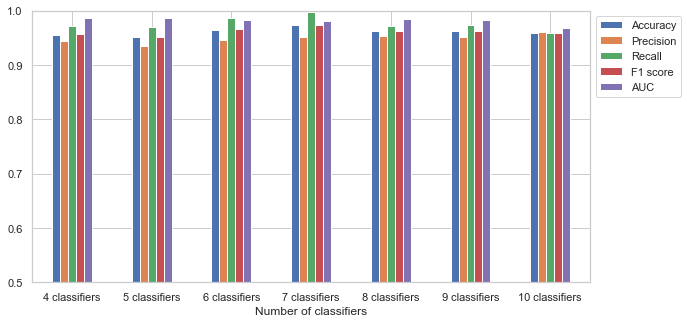

In [12]:
ax = resultsDF.plot.bar(rot=0)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0.5, 1)

### <font color='purple'> Bar Chart for best Pool

In [13]:
des_7_models_results_3_4.drop(['accuracy_std', 'precision_std', 'recall_std', 'f1_std', 'auc_std'], axis=1, inplace=True)

In [14]:
des_7_models_results_3_4.rename(columns={"accuracy": "Accuracy", "precision": "Precision", 
                          "recall":"Recall", "f1_score": "F1", "auc": "AUC"}, inplace=True)

In [15]:
des_7_models_results_3_4

,method,Accuracy,Precision,Recall,F1,AUC
0,FIRE-KNORA-U,0.970,0.943,1.000,0.971,0.984
1,KNORA-U,0.968,0.941,1.000,0.969,0.984
2,FIRE-KNORA-E,0.980,0.962,1.000,0.980,0.988
3,KNORA-E,0.980,0.962,1.000,0.981,0.988
4,FIRE-METADES,0.976,0.960,0.994,0.977,0.986
5,METADES,0.971,0.957,0.986,0.972,0.985
6,FIRE-DESKNN,0.972,0.948,0.999,0.973,0.986
7,DESKNN,0.972,0.947,0.999,0.973,0.986
10,FIRE-DESP,0.972,0.948,1.000,0.973,0.987
11,DESP,0.971,0.946,1.000,0.972,0.987


In [16]:
des_7_models_results_3_4.set_index('method',inplace=True)

In [17]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")

(0.5, 1.0)

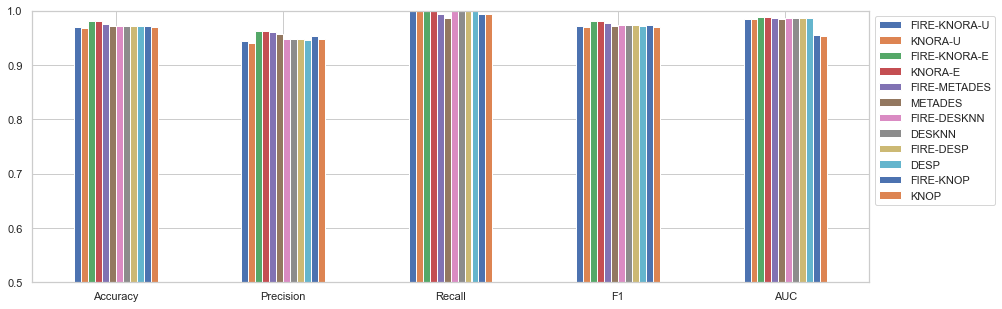

In [18]:
ax = des_7_models_results_3_4.T.plot.bar(rot=0, legend=True)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0.5, 1)

### <font color='purple'> ROC Curve 

In [19]:
def remove_rows(df): 
    indexNames = df[(df['method'] == 'FIRE-MCB') | (df['method'] == 'MCB')].index
    df.drop(indexNames , inplace=True)
    return df 

In [20]:
results_ROC = pd.read_csv("mix_pool_results/des_mix_pool_results_7_table_for_ROC_3-4.csv")

In [21]:
names = ['FIRE-KNORA-U',
         'KNORA-U',
         'FIRE-KNORA-E',
         'KNORA-E',
         'FIRE-METADES',
         'METADES',
         'FIRE-DESKNN',
         'DESKNN',
         'FIRE-MCB', 
         'MCB', 
         'FIRE-DESP',
         'DESP',
         'FIRE-KNOP',
         'KNOP']

results_ROC['method'] = names

In [22]:
results_ROC = remove_rows(results_ROC)

In [23]:
results_ROC.set_index('method', inplace=True)

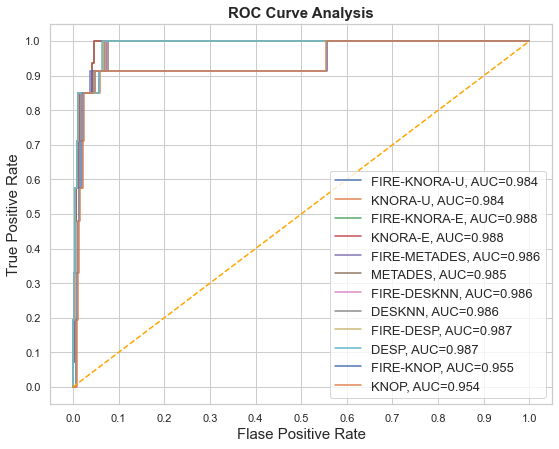

In [24]:
fig = plt.figure(figsize=(9,7))
sns.set_style("whitegrid")
for i in results_ROC.index:
    plt.plot(ast.literal_eval(re.sub("\s+", ",", results_ROC.loc[i]['fpr'].strip())), 
             ast.literal_eval(re.sub("\s+", ",", results_ROC.loc[i]['tpr'].strip())), 
             label="{}, AUC={:.3f}".format(i, results_ROC.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### <font color='purple'>Critical Diagram 

In [7]:
def remove_rows(df): 
    indexNames = df[(df['models'] == 'FIRE-MCB') | (df['models'] == 'MCB')].index
    df.drop(indexNames , inplace=True)
    return df

In [8]:
results_CD = pd.read_csv("mix_pool_results/des_mix_pool_results_7_extend_for_CD_3-4_150_hold_outs.csv")

In [9]:
results_CD = remove_rows(results_CD)

In [10]:
def compare_results(results, lst_models):      
        fried_result = friedmanchisquare(*results)
        
        ranks = np.array([rankdata(-p) for p in results])
        
        # Calculating the average ranks.
        average_ranks = np.mean(ranks, axis=0)

        names = [lst_models[i] + ' - ' + str(round(average_ranks[i], 3)) for i in range(len(average_ranks))]
        
        # This method computes the critical difference for Nemenyi test with alpha=0.1.
        # For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
        cd = compute_CD(average_ranks, n=len(results),alpha='0.05', test='nemenyi')
        
        return fried_result, ranks, names, cd , average_ranks

In [11]:
def plot_comparisons(fried_result, names, cd, average_ranks):    
    # This method generates the plot.
    graph_ranks(average_ranks, names=names,
                        cd=cd, width=10, textspace=1.5)
        
    plt.title(f'Friedman-Nemenyi={round(fried_result.pvalue, 4)}\nCD={round(cd, 3)}')
    plt.show()
    
    return

In [12]:
names = ["FIRE-KNORA-U", "KNORA-U", "FIRE-KNORA-E", "KNORA-E", "FIRE-METADES", "METADES",
         "FIRE-DESKNN", "DESKNN", "FIRE-DESP", "DESP", "FIRE-KNOP", "KNOP"]

dct_results = {}

for n in names:
    res = ast.literal_eval(results_CD[results_CD.models == n].accuracy.to_list()[0])
    dct_results[n] = res
    
results = np.c_[dct_results['FIRE-KNORA-U'], dct_results['KNORA-U'], dct_results['FIRE-KNORA-E'], 
                dct_results['KNORA-E'], dct_results['FIRE-METADES'], dct_results['METADES'], 
                dct_results['FIRE-DESKNN'], dct_results['DESKNN'], dct_results['FIRE-DESP'], 
                dct_results['DESP'], dct_results['FIRE-KNOP'], dct_results['KNOP']]

fried_result, ranks, names, cd, average_ranks = compare_results(results, names)

In [13]:
def plot_comparisons(fried_result, names, cd, average_ranks):    
    # This method generates the plot.
    graph_ranks(average_ranks, names=names,
                        cd=cd, width=10, textspace=1.5)
        
    plt.title(f'Friedman-Nemenyi < 0.001 \nCD={round(cd, 3)}')
    plt.show()
    
    return

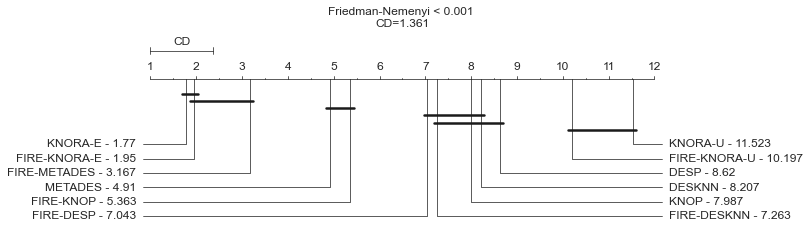

In [14]:
plot_comparisons(fried_result, names, cd, average_ranks)

In [29]:
des_7_models_results_3_4

,Accuracy,Precision,Recall,F1,AUC
method,,,,,
FIRE-KNORA-U,0.969,0.942,1.000,0.970,0.987
KNORA-U,0.968,0.939,1.000,0.969,0.986
FIRE-KNORA-E,0.976,0.955,1.000,0.977,0.988
KNORA-E,0.977,0.956,1.000,0.977,0.988
FIRE-METADES,0.971,0.956,0.988,0.972,0.986
METADES,0.966,0.952,0.983,0.967,0.985
FIRE-DESKNN,0.971,0.946,1.000,0.972,0.986
DESKNN,0.971,0.946,1.000,0.972,0.986
FIRE-DESP,0.973,0.948,1.000,0.973,0.987


In [50]:
des_7_models_results_3_4.describe().T

,count,mean,std,min,25%,50%,75%,max
accuracy,12.0,0.971000,0.003464,0.966,0.96875,0.9710,0.97300,0.977
accuracy_std,12.0,0.006333,0.007011,0.001,0.00175,0.0020,0.01200,0.018
precision,12.0,0.949167,0.005557,0.939,0.94600,0.9495,0.95350,0.956
precision_std,12.0,0.003167,0.000937,0.002,0.00275,0.0030,0.00400,0.005
recall,12.0,0.995667,0.006959,0.983,0.99250,1.0000,1.00000,1.000
recall_std,12.0,0.010333,0.015652,0.000,0.00000,0.0000,0.02400,0.036
f1_score,12.0,0.971750,0.003223,0.967,0.96975,0.9720,0.97300,0.977
f1_std,12.0,0.006417,0.007537,0.001,0.00100,0.0020,0.01225,0.019
auc,12.0,0.985583,0.002610,0.979,0.98575,0.9860,0.98700,0.988
auc_std,12.0,0.001333,0.000985,0.000,0.00100,0.0010,0.00200,0.003


In [36]:
des_7_models_results_3_4

,method,accuracy,accuracy_std,precision,precision_std,recall,recall_std,f1_score,f1_std,auc,auc_std
0,FIRE-KNORA-U,0.969,0.002,0.942,0.004,1.000,0.000,0.970,0.002,0.987,0.001
1,KNORA-U,0.968,0.003,0.939,0.005,1.000,0.000,0.969,0.002,0.986,0.001
2,FIRE-KNORA-E,0.976,0.001,0.955,0.002,1.000,0.000,0.977,0.001,0.988,0.001
3,KNORA-E,0.977,0.001,0.956,0.002,1.000,0.000,0.977,0.001,0.988,0.001
4,FIRE-METADES,0.971,0.015,0.956,0.003,0.988,0.030,0.972,0.016,0.986,0.002
5,METADES,0.966,0.018,0.952,0.004,0.983,0.036,0.967,0.019,0.985,0.003
6,FIRE-DESKNN,0.971,0.001,0.946,0.003,1.000,0.000,0.972,0.001,0.986,0.001
7,DESKNN,0.971,0.002,0.946,0.003,1.000,0.000,0.972,0.001,0.986,0.001
10,FIRE-DESP,0.973,0.002,0.948,0.003,1.000,0.000,0.973,0.002,0.987,0.000
11,DESP,0.971,0.002,0.946,0.004,1.000,0.000,0.972,0.002,0.987,0.000


In [40]:
results_CD[results_CD.models == "KNOP"].accuracy.to_list()

['[0.9314994606256742, 0.9741100323624595, 0.9730312837108953, 0.9735706580366774, 0.9746494066882416, 0.9784250269687162, 0.9741100323624595, 0.9751887810140237, 0.9757281553398058, 0.9741100323624595, 0.9325782092772384, 0.9757281553398058, 0.9751887810140237, 0.9741100323624595, 0.9320388349514563]']

In [46]:
results_CD[results_CD.models == "KNORA-U"].accuracy.to_list()

['[0.9660194174757282, 0.970873786407767, 0.9644012944983819, 0.9676375404530745, 0.9660194174757282, 0.970873786407767, 0.9676375404530745, 0.9724919093851133, 0.9627831715210357, 0.9687162891046386, 0.9670981661272924, 0.9692556634304207, 0.9681769147788565, 0.964940668824164, 0.9681769147788565]']